### 앙상블(Ensemble)
: 여러개의 분류모델을 조합해서 더 나은 성능을 내는 방법

### Random Forest
: 의사결정나무를 단일모델조합(bagging)해서 예측을 실행하는 모델



In [66]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(5)   # 랜덤 시작값 고정


In [67]:
# 손글씨 데이터
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [68]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [69]:
labels

array([0, 1, 2, ..., 8, 9, 8])

#### 의사결정 나무를 이용한 교차검증 10번 실시

In [70]:
# Model 만들기

dt = DecisionTreeClassifier()

cv_scores = []

for i in range(10):
    scores = cross_val_score(
        dt,
        features,
        labels,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(scores.mean()) # scores의 평균 데이터만 cv_scores에 추가

cv_scores


[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

### RandomForest를 이용한 교차 검증 10번 실시

In [71]:
# 모델 만들기
rf = RandomForestClassifier()

cv_scores = []

for i in range(10):
    scores = cross_val_score(
        rf,
        features,
        labels,
        cv=10,
        scoring='accuracy'
    )
    cv_scores.append(scores.mean())

cv_scores


[0.9526939788950962,
 0.9487957790192427,
 0.9510211049037863,
 0.9549286157666046,
 0.9471322160148976,
 0.9487988826815641,
 0.952122905027933,
 0.9454531346989447,
 0.9460180012414648,
 0.9471322160148976]

---
### 교차검증 함수만들기

In [72]:
# 교차검증을 10번 실행하여 평균 정확도를 구하는 함수

def cross_validation(classifier, features, labels):
    cv_scores = []
    for _ in range(10):
        scores = cross_val_score(
        classifier,
        features,
        labels,
        cv=10,
        scoring='accuracy'
        )
        cv_scores.append(scores.mean())
    return cv_scores


In [73]:
dt_cv_scores = cross_validation(dt, features, labels)
dt_cv_scores


[0.8330509000620733,
 0.8224736188702669,
 0.8268963376784605,
 0.8246710117939168,
 0.825788330229671,
 0.821880819366853,
 0.833584729981378,
 0.8280167597765363,
 0.826340782122905,
 0.8235816263190564]

In [74]:
# RadmonForest
rf_cv_scores = cross_validation(rf, features, labels)
rf_cv_scores


[0.9504655493482307,
 0.9410117939168219,
 0.9510211049037863,
 0.9549162011173185,
 0.9504469273743016,
 0.9449130974549969,
 0.9510117939168218,
 0.9493513345747981,
 0.9488081936685286,
 0.9471198013656114]

### 기능이 추가된 함수 만들기
- 기존 반복횟수는 5
- 기존 cross validation 횟수는 10

In [75]:
def cross_validation2(classifier, features, labels, repeats=5, cv_count=10):
    cv_scores = []
    for _ in range(repeats):
        scores = cross_val_score(
            classifier,
            features,
            labels,
            cv=cv_count,
            scoring='accuracy'
        )
        cv_scores.append(scores.mean())
    return cv_scores

In [76]:
cross_validation2(dt, features, labels)

[0.831368715083799,
 0.8241340782122905,
 0.8319242706393546,
 0.8252296710117939,
 0.8269056486654252]

In [77]:
cross_validation2(rf, features, labels, 10, 5) # 모델명, feature data, target data, 반복횟수, croos validation 횟수

[0.9404766326214794,
 0.9376973073351904,
 0.9388022284122564,
 0.9399117920148561,
 0.9410383782110803,
 0.9360229031259673,
 0.9377034973692355,
 0.9365861962240792,
 0.9421463943051688,
 0.9332435778396782]

### 랜덤포레스트와 의사결정나무의 정확도 시각화

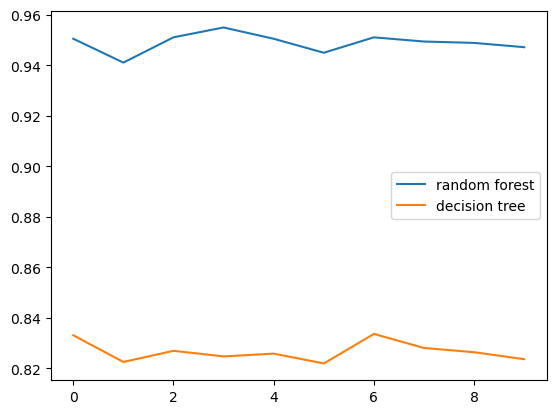

In [78]:
cv_list = {
    'random forest' : rf_cv_scores,
    'decision tree' : dt_cv_scores
}

df = pd.DataFrame(cv_list)
df.plot()
plt.show()

In [79]:
# 각 모델의 정확도
print('decision tree : ', np.mean(dt_cv_scores))
print('random forest : ', np.mean(rf_cv_scores))

decision tree :  0.8266284916201118
random forest :  0.9489065797641215


---
### 보팅(Voting) 앙상블
: 단일 모델들을 앙상블하여 더 나은 예측을 하는 모델 생성

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
# 손글씨 데이터
train_data, test_data, train_target, test_target = train_test_split(
    features,   
    labels,
    test_size=0.2,
    random_state=42
)


In [82]:
# 의사결정나무
dtree = DecisionTreeClassifier()
dtree.fit(train_data, train_target)
dtree_pred = dtree.predict(test_data)

In [83]:
# kNN
knn = KNeighborsClassifier()
knn.fit(train_data, train_target)
knn_pred = knn.predict(test_data)


In [84]:
# SVM
svm = SVC()
svm.fit(train_data, train_target)
svm_pred = svm.predict(test_data)

In [85]:
# 정확도
print('dtree : ', accuracy_score(test_target, dtree_pred))
print('knn : ', accuracy_score(test_target, knn_pred))
print('svm : ', accuracy_score(test_target, svm_pred))


dtree :  0.8388888888888889
knn :  0.9861111111111112
svm :  0.9861111111111112


### 하드보팅
: 각각의 모델들의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 낸다.


In [87]:
voting_clf = VotingClassifier(
    estimators=[('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], # 비중을 다르게 할 수 있음
    voting='hard'
)


In [88]:
voting_clf.fit(train_data, train_target)
hard_voting_pred = voting_clf.predict(test_data)
accuracy_score(test_target, hard_voting_pred)


0.9861111111111112

### 소프트 보팅
: 소프트 보팅은 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론내는 방식


In [89]:
# 소프트보팅은 확률이 필요하므로 SVM에 확률 기능을 추가
svm = SVC(probability=True)


In [90]:
voting_clf = VotingClassifier(
    estimators=[('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], # 비중을 다르게 할 수 있음
    voting='soft'
)


In [91]:
voting_clf.fit(train_data, train_target)
soft_voting_pred = voting_clf.predict(test_data)
accuracy_score(test_target, soft_voting_pred)


0.9861111111111112